<a href="https://colab.research.google.com/github/deva237/DS-Internship/blob/main/creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA** **ENGINEERING**

In [ ]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
X = df.drop('Time', axis=1)
X = X.drop('Class', axis=1)
Y = df['Class']
print(X)
print(Y)

             V1        V2        V3        V4        V5        V6        V7  \
0     -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1      1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
...         ...       ...       ...       ...       ...       ...       ...   
13949  1.252924 -0.182189 -0.802716 -0.210981  1.916713  3.643624 -0.778711   
13950 -0.346979 -2.103284 -0.685061  1.961605 -0.401125  0.473632  1.133816   
13951 -6.053652 -5.988723  0.810413 -0.011811  1.308135 -0.590803 -0.725838   
13952  1.169121 -1.284945  0.032717 -0.681670  0.660598  4.412578 -1.913115   
13953 -6.917152  5.854171 -1.652458 -1.488884 -0.833891 -0.344418  0.393789   

             V8        V9       V10  ...       V20 

[0.01516448 0.03426511 0.04585836 0.04446107 0.0187751  0.03950707
 0.0342272  0.01169594 0.04396358 0.05488672 0.06344521 0.08196062
 0.00818868 0.03430681 0.01205188 0.05800463 0.06153407 0.04066107
 0.02019531 0.01468726 0.02365923 0.02321709 0.01543836 0.02191032
 0.02157595 0.06718996 0.02408567 0.01682486 0.04825838]


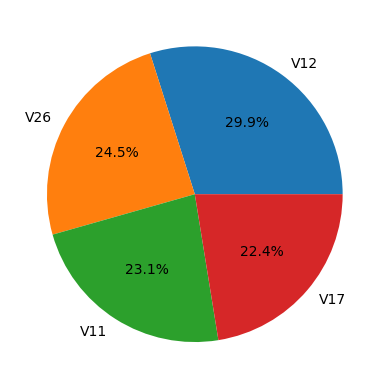

In [ ]:
#Feature Selection

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame handling
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical variables

model = ExtraTreesClassifier()

# Assuming X contains categorical features, encode them using LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform) # Apply LabelEncoder to all columns in X

# Handle missing values in the target variable 'Y'
Y = Y.dropna() # Drop rows with missing values in 'Y'

# Align X_encoded and Y after handling missing values
X_encoded = X_encoded.loc[Y.index] # Select rows in X_encoded that correspond to non-missing Y values

model.fit(X_encoded,Y) # Fit the model with encoded features and non-missing target values
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X_encoded.columns) # Use encoded column names
feat_importance.nlargest(4).plot(kind='pie', autopct='%1.1f%%')
#plot(kind='box')
# plot(kind='area')
# plot(kind='line', marker='o')
plt.show()

In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64


In [ ]:
# dealing with missing values
df['Amount'].fillna((df['Amount'].mean()), inplace=True)
df['Class'].fillna((df['Class'].mean()), inplace=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the credit card fraud detection dataset (assuming it's in CSV format)
creditcard_data = pd.read_csv('creditcard.csv')

# Split the dataset into training and test sets
train_df, test_df = train_test_split(creditcard_data, test_size=0.2, random_state=42)

# Define bins and labels for 'Amount' column
amount_bins = [0, 100, 500, 1000, 5000, 10000, 25000]
amount_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High']

# Apply bins to 'Amount' column
train_df['AmountGroup'] = pd.cut(train_df['Amount'], bins=amount_bins, labels=amount_labels, right=False)
test_df['AmountGroup'] = pd.cut(test_df['Amount'], bins=amount_bins, labels=amount_labels, right=False)

# Display the first few rows of the modified training data
print(train_df.head())

# Display the first few rows of the modified test data
print(test_df.head())


        Time        V1        V2        V3        V4        V5        V6  \
7051    9242  0.720616 -1.206439  0.837777 -0.763449 -1.611881 -0.936542   
10303  16266 -0.658234  1.210862  1.168147 -0.013270  0.422688 -0.005415   
6740    8463 -1.659875  0.386499  3.934998  3.211911  0.214577  2.377242   
9586   14421 -0.832451  1.014867  2.236497  0.414555  0.287894 -1.234486   
8593   11589 -2.141436 -1.875038  1.841155 -0.070644  1.821235 -2.134175   

             V7        V8        V9  ...       V22       V23       V24  \
7051  -0.319289 -0.287772  3.021197  ...  0.406890 -0.307065  0.779556   
10303  0.359856  0.204094  0.949485  ... -0.790989  0.000223 -0.443601   
6740  -0.945849  0.306652  2.449614  ...  1.001948 -0.549951 -0.259485   
9586   0.743860 -0.219901  0.602958  ... -0.584112 -0.004267  0.823933   
8593  -0.982009  0.103642  1.845683  ... -0.280573  0.329505  0.378863   

            V25       V26       V27       V28  Amount  Class  AmountGroup  
7051   0.351934  0.022

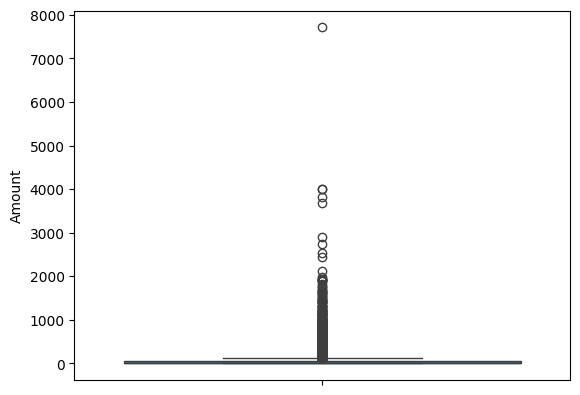

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Amount'])
plt.show()

In [ ]:
#Dealing with Outliers using Interquantile Range
# Check the data type of the column and convert if necessary
if df['Amount'].dtype == object:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce') # Convert to numeric, replace non-numeric with NaN

# Fill NaN values if any were introduced during conversion
df['Amount'].fillna(df['Amount'].mean(), inplace=True) # Replace NaN with mean

print(df['Amount'])
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['Amount'] < lower].values
out2=df[df['Amount'] > upper].values

df['Amount'].replace(out1,lower,inplace=True)
df['Amount'].replace(out2,upper,inplace=True)

print(df['Amount'])

0        149.620000
1          2.690000
2        378.660000
3        123.500000
4         69.990000
            ...    
13949     23.740000
13950    794.200000
13951     60.000000
13952     90.000000
13953     63.882442
Name: Amount, Length: 13954, dtype: float64
46.6675
122.15875
-64.51125
0        122.158750
1          2.690000
2        122.158750
3        122.158750
4         69.990000
            ...    
13949     23.740000
13950    122.158750
13951     60.000000
13952     90.000000
13953     63.882442
Name: Amount, Length: 13954, dtype: float64


In [ ]:
#Oversampling and Under Sampling

from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))


# Before applying SMOTE, fill NaN values in 'X'
X = X.fillna(X.mean()) # Fill NaN with the mean of each column

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

Counter({0.0: 13897, 1.0: 56})


ValueError: Found input variables with inconsistent numbers of samples: [13954, 13953]

In [ ]:
#Oversampling and Under Sampling

from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)

# Check the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# If there is a mismatch, investigate and fix the issue.
# For example, if Y is missing a value, you might append the appropriate value:
if X.shape[0] != Y.shape[0]:
    # Assuming Y is missing a value, append the most frequent class
    most_frequent_class = Y.value_counts().index[0]
    Y = np.append(Y, [most_frequent_class])  # Append the missing value

# After fixing the mismatch, proceed with resampling:
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))


# Before applying SMOTE, fill NaN values in 'X'
X = X.fillna(X.mean()) # Fill NaN with the mean of each column

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

Counter({0.0: 13897, 1.0: 56})
Shape of X: (13954, 29)
Shape of Y: (13953,)


NameError: name 'np' is not defined

In [ ]:
#Oversampling and Under Sampling

from collections import Counter
import numpy as np # import numpy

print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)

# Check the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# If there is a mismatch, investigate and fix the issue.
# For example, if Y is missing a value, you might append the appropriate value:
if X.shape[0] != Y.shape[0]:
    # Assuming Y is missing a value, append the most frequent class
    most_frequent_class = Y.value_

Counter({0.0: 13897, 1.0: 56})
Shape of X: (13954, 29)
Shape of Y: (13953,)


AttributeError: 'Series' object has no attribute 'value_'

In [ ]:
#Oversampling and Under Sampling

from collections import Counter
import numpy as np # import numpy

print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)

# Check the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# If there is a mismatch, investigate and fix the issue.
# For example, if Y is missing a value, you might append the appropriate value:
if X.shape[0] != Y.shape[0]:
    # Assuming Y is missing a value, append the most frequent class
    most_frequent_class = Y.value_counts().index[0]
    Y = np.append(Y, [most_frequent_class])  # Append the missing value

# After fixing the mismatch, proceed with resampling:
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))


# Before applying SMOTE, fill NaN values in 'X'
X = X.fillna(X.mean()) # Fill NaN with the mean of each column

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

Counter({0.0: 13897, 1.0: 56})
Shape of X: (13954, 29)
Shape of Y: (13953,)
Counter({0.0: 13898, 1.0: 13898})


In [ ]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # Import pandas for handling DataFrames

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Amount', axis=1)
X = X.drop('Class', axis=1)
Y = df['Class']

# Fill any remaining NaN values in the entire DataFrame 'X'
X.fillna(X.mean(), inplace=True)  # Fill NaN with the mean of each column

pca.fit(X)
X=pca.transform(X)

# --- Check and convert Y to binary if needed ---
# Check if Y is already binary (contains only two unique values)
if len(Y.unique()) != 2:
    print("Warning: Y does not appear to be binary. Converting...")
    # Convert Y to binary (assuming it's a continuous variable you want to classify)
    threshold = Y.mean()  # Choose a threshold for binary classification
    Y = (Y > threshold).astype(int)  # Convert to 0 and 1 based on threshold

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)

# Check the types of your variables before calculating accuracy
print("Type of y_test:", type(y_test))
print("Type of y_pred:", type(y_pred))
print("Unique values in y_test:", y_test.unique())
print("Unique values in y_pred:", np.unique(y_pred))

print(accuracy_score(y_test,y_pred))

[[-1.01211621e+04 -6.89867392e-02]
 [-1.01211621e+04  9.57548424e-02]
 [-1.01201622e+04 -1.20558163e-01]
 ...
 [ 1.46378382e+04 -1.34253673e-02]
 [ 1.46378382e+04 -1.05296060e+00]
 [ 1.46378381e+04  2.92669738e+00]]
Type of y_test: <class 'pandas.core.series.Series'>
Type of y_pred: <class 'numpy.ndarray'>
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]
0.9976116551229998


# **ML** **CLASSIFICATION**

In [ ]:
# naive
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Read the dataset
df = pd.read_csv("creditcard.csv")

# Prepare the feature and target variables
x = df.drop(['Time', 'Amount'], axis=1)
y = df['Class']

# One-hot encode categorical variables if necessary
x = pd.get_dummies(x)

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.4)

# Handle Missing Values in 'y_train' and 'y_test'
# Fill NaN with the most frequent class in the respective sets
y_train = y_train.fillna(y_train.value_counts().index[0])
y_test = y_test.fillna(y_test.value_counts().index[0])

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = nb.predict(X_test)

# Print the accuracy score
print("Naive Bayes: ", accuracy_score(y_test, y_pred1))

Naive Bayes:  1.0


In [ ]:
#Decision Tree

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # Import SimpleImputer

dt=tree.DecisionTreeClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

# Handle Missing Values in 'y_train' and 'y_test'
# Fill NaN with the most frequent class in the respective sets
y_train = y_train.fillna(y_train.value_counts().index[0])
y_test = y_test.fillna(y_test.value_counts().index[0])

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
#  Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaN values

rf=RandomForestClassifier()

# Assuming 'x' and 'y' are defined from previous cells, handle NaN in 'y' before splitting
imputer = SimpleImputer(strategy='most_frequent') # Use most frequent for categorical target
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)) # Reshape for single feature imputation
y_imputed = y_imputed.ravel() # Flatten back to 1D array

X_train,X_test,y_train,y_test=train_test_split(x, y_imputed, random_state=0,test_size=0.3)

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))

1.0


# **VISUALIZATION**

In [ ]:
import pandas as pd              #pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns


df=pd.read_csv("creditcard.csv")

#Preparing X and Y

X = df.drop('Amount', axis=1)
X = X.drop('Class', axis=1)
Y = df['Class']

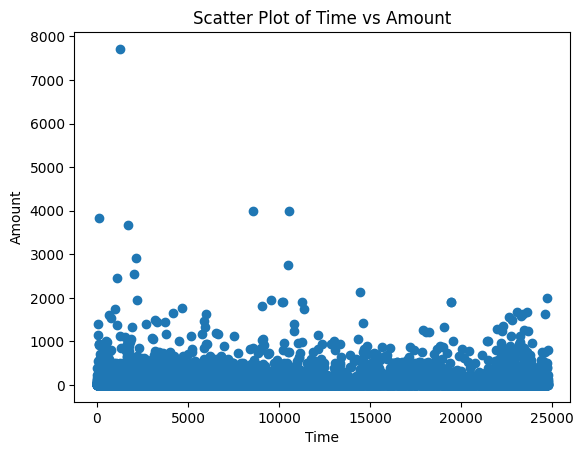

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the wine quality dataset (assuming it's in CSV format)
wine_data = pd.read_csv('creditcard.csv')

# Plotting PetalLengthCm vs PetalWidthCm
plt.scatter(wine_data['Time'], wine_data['Amount'])
plt.title("Scatter Plot of Time vs Amount")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

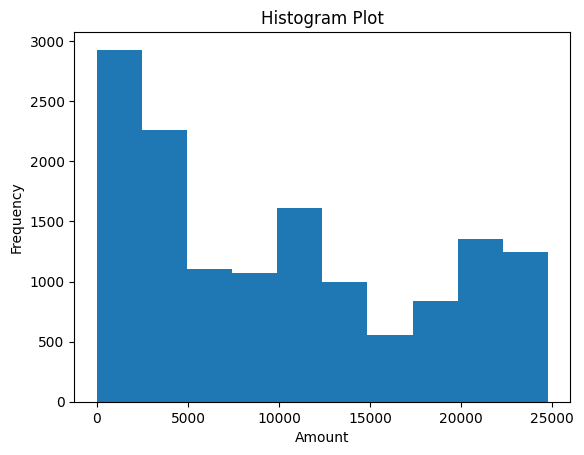

In [ ]:
#Histrogram shows the distribution of a continuous variable.
  # It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["Time"])
plt.title("Histogram Plot")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

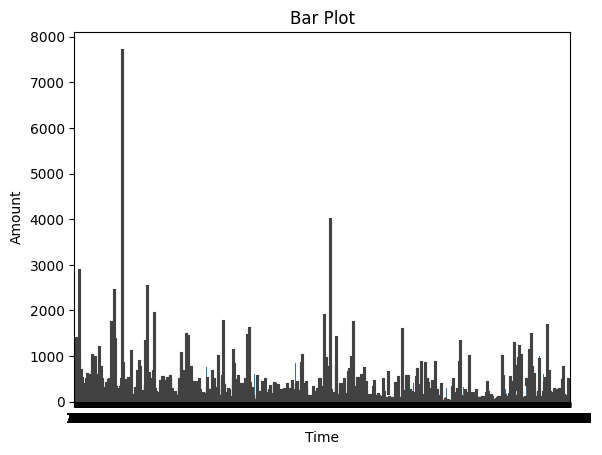

In [ ]:
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(x="Time", y="Amount", data=df) # Pass data as a named argument and specify x and y
plt.title("Bar Plot")
plt.show()

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

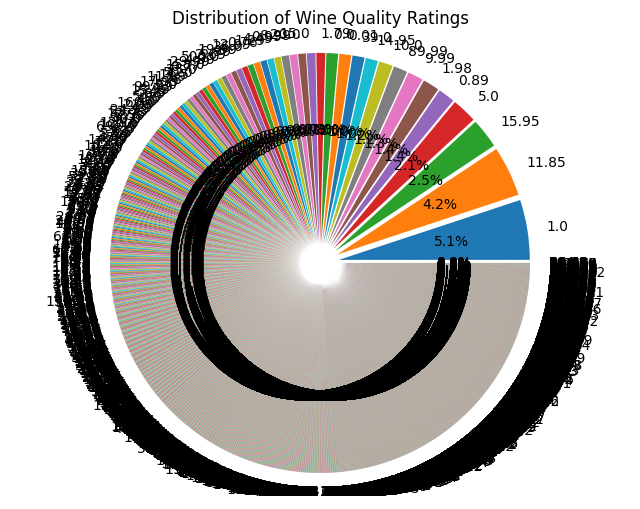

In [ ]:
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
import matplotlib.pyplot as plt

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('wine_quality.csv')

# Display the first few rows to understand the structure
print(df.head())

# Counting the frequency of each 'quality' category
quality_counts = df['Amount'].value_counts()

# Creating an explode tuple with the correct length
explode = tuple([0.1] * len(quality_counts)) # Adjust 0.1 to your desired explosion value

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', explode=explode) # Use the dynamically created explode tuple
plt.title('Distribution of Wine Quality Ratings')
plt.axis('equal')
plt.show()

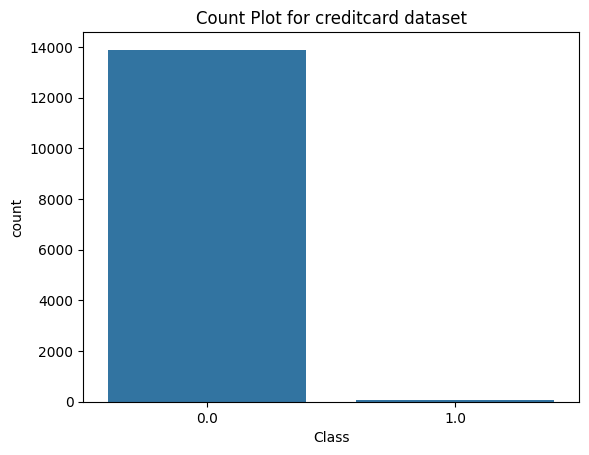

In [ ]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Class', data = df)
plt.title("Count Plot for creditcard dataset")
plt.show()

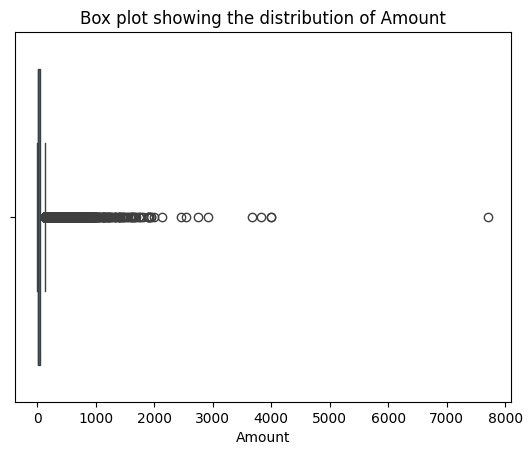

In [ ]:
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='Amount', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Amount")
plt.show()

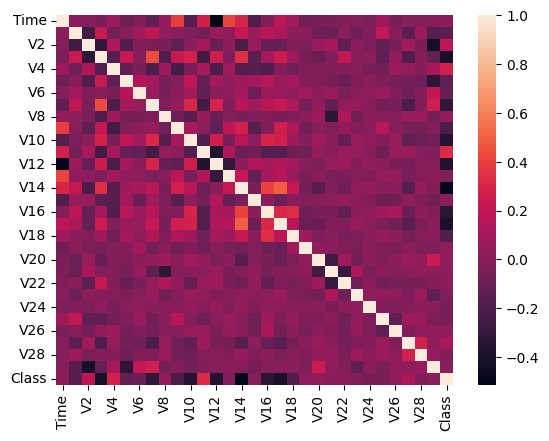

In [ ]:
#Heatmap is a type of Matrix plot that allows you to plot data as color-encoded matrices. It is mostly used to find multi-collinearity in a dataset.
numeric_df = df.select_dtypes(include=['number']) # Select only numeric columns for correlation calculation
sns.heatmap(numeric_df.corr())
plt.show()